# Regression Project - Gas Prices in Brazil (2004 - 2021)

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Exploração

In [305]:
DATA_PATH = './data/2004-2021.tsv'

In [306]:
df = pd.read_csv(DATA_PATH, sep='\t')

In [307]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [308]:
print(len(df.columns))
print(len(df))
print(df.shape)
print(df.dtypes)

18
120823
(120823, 18)
DATA INICIAL                      object
DATA FINAL                        object
REGIÃO                            object
ESTADO                            object
PRODUTO                           object
NÚMERO DE POSTOS PESQUISADOS       int64
UNIDADE DE MEDIDA                 object
PREÇO MÉDIO REVENDA              float64
DESVIO PADRÃO REVENDA            float64
PREÇO MÍNIMO REVENDA             float64
PREÇO MÁXIMO REVENDA             float64
MARGEM MÉDIA REVENDA              object
COEF DE VARIAÇÃO REVENDA         float64
PREÇO MÉDIO DISTRIBUIÇÃO          object
DESVIO PADRÃO DISTRIBUIÇÃO        object
PREÇO MÍNIMO DISTRIBUIÇÃO         object
PREÇO MÁXIMO DISTRIBUIÇÃO         object
COEF DE VARIAÇÃO DISTRIBUIÇÃO     object
dtype: object


In [309]:
df.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA
count,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000
mean,221.066461,11.473440,0.684132,9.977821,13.233902,0.045298
std,387.940239,19.161823,1.403317,16.433783,22.451445,0.024763
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000
25%,39.000000,2.157000,0.075000,1.989000,2.420000,0.029000
50%,99.000000,2.899000,0.121000,2.690000,3.200000,0.041000
75%,226.000000,4.026000,0.204000,3.790000,4.589000,0.058000
max,4167.000000,107.500000,10.748000,100.000000,120.000000,0.395000


In [310]:
print(df['REGIÃO'].value_counts())
print(df['ESTADO'].value_counts())
print(df['PRODUTO'].value_counts())
print(df['UNIDADE DE MEDIDA'].value_counts())

REGIÃO
NORDESTE        41671
NORTE           27989
SUDESTE         19270
CENTRO OESTE    17449
SUL             14444
Name: count, dtype: int64
ESTADO
PARAIBA                4819
RIO DE JANEIRO         4819
SAO PAULO              4819
RIO GRANDE DO SUL      4819
BAHIA                  4819
SANTA CATARINA         4818
RIO GRANDE DO NORTE    4818
MINAS GERAIS           4817
ESPIRITO SANTO         4815
PERNAMBUCO             4813
CEARA                  4813
PARANA                 4807
ALAGOAS                4806
SERGIPE                4795
MATO GROSSO DO SUL     4793
MATO GROSSO            4566
AMAZONAS               4414
GOIAS                  4134
PIAUI                  4017
MARANHAO               3971
DISTRITO FEDERAL       3956
PARA                   3955
TOCANTINS              3953
RONDONIA               3950
ACRE                   3948
RORAIMA                3938
AMAPA                  3831
Name: count, dtype: int64
PRODUTO
GASOLINA COMUM        23570
GLP                   23561
ETAN

In [311]:
df['ANO'] = pd.DatetimeIndex(df['DATA FINAL']).year
df['MES'] = pd.DatetimeIndex(df['DATA FINAL']).month

df['ANO/MES'] = pd.to_datetime({'day': 1,'month': df['MES'],'year': df['ANO']})

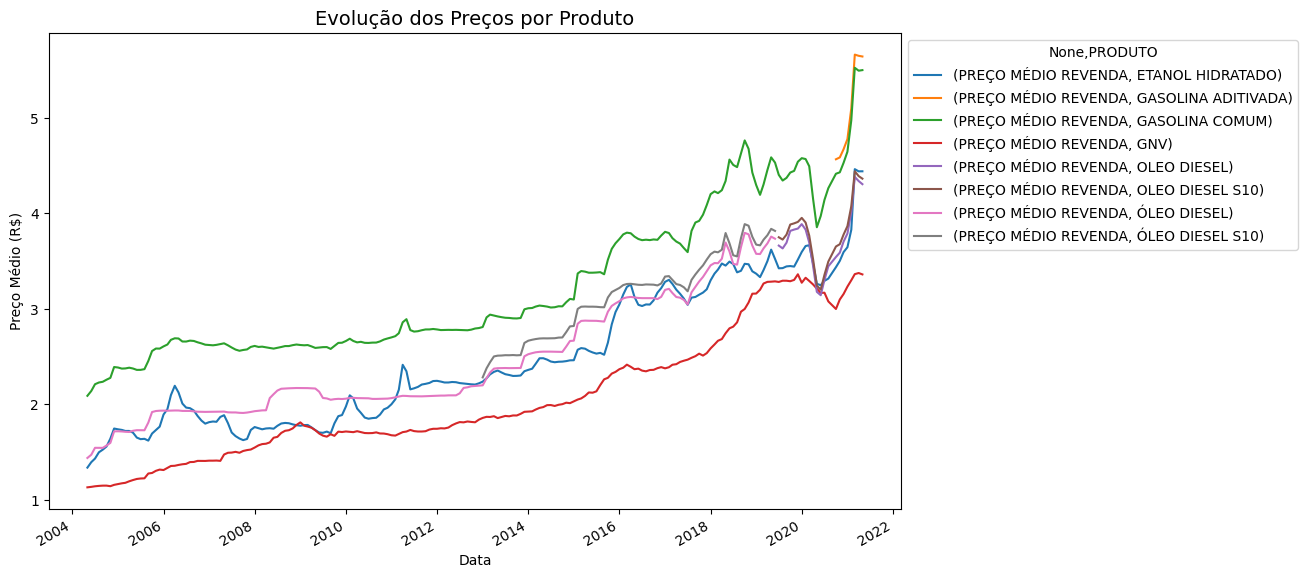

In [312]:
df1 = df.query("PRODUTO != 'GLP'")
df1 = df1[['PRODUTO','ANO/MES','PREÇO MÉDIO REVENDA']].groupby(['PRODUTO','ANO/MES']).mean().sort_values(by=['PRODUTO','ANO/MES'], ascending=True)
df2 = df1.pivot_table(index=['ANO/MES'], columns=['PRODUTO'], values=['PREÇO MÉDIO REVENDA'])
ax = df2.plot(kind='line', figsize=(11,7))
ax.set_ylabel('Preço Médio (R$)')
ax.set_xlabel('Data')
ax.set_title('Evolução dos Preços por Produto', fontsize=14)
ax.get_legend().set_bbox_to_anchor((1, 1))

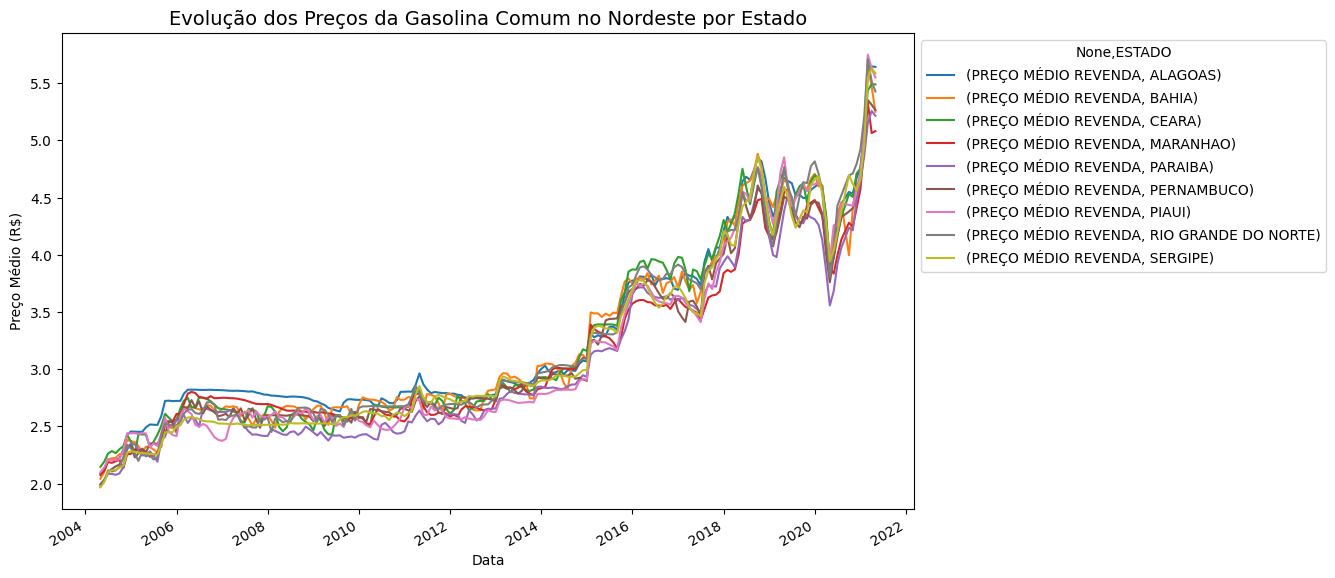

In [313]:
df1 = df.query("PRODUTO == 'GASOLINA COMUM' & REGIÃO=='NORDESTE'")
df1 = df1[['ESTADO','ANO/MES','PREÇO MÉDIO REVENDA']].groupby(['ESTADO','ANO/MES']).mean().sort_values(by=['ESTADO','ANO/MES'], ascending=True)
df2 = df1.pivot_table(index=['ANO/MES'], columns=['ESTADO'], values=['PREÇO MÉDIO REVENDA'])
ax = df2.plot(kind='line', figsize=(11,7))
ax.set_ylabel('Preço Médio (R$)')
ax.set_xlabel('Data')
ax.set_title('Evolução dos Preços da Gasolina Comum no Nordeste por Estado', fontsize=14)
ax.get_legend().set_bbox_to_anchor((1, 1))

## Limpeza e normalização dos Dados

### Transformações iniciais no DataFrame

In [314]:
for col in ["DATA INICIAL", "DATA FINAL"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

categorical_true = ["REGIÃO", "ESTADO", "PRODUTO", "UNIDADE DE MEDIDA"]
date_cols = ["DATA INICIAL", "DATA FINAL"]

obj_cols = df.select_dtypes(include=["object"]).columns.tolist()

numeric_object_cols = [c for c in obj_cols if c not in categorical_true]

for col in numeric_object_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df.dtypes)

DATA INICIAL                     datetime64[ns]
DATA FINAL                       datetime64[ns]
REGIÃO                                   object
ESTADO                                   object
PRODUTO                                  object
NÚMERO DE POSTOS PESQUISADOS              int64
UNIDADE DE MEDIDA                        object
PREÇO MÉDIO REVENDA                     float64
DESVIO PADRÃO REVENDA                   float64
PREÇO MÍNIMO REVENDA                    float64
PREÇO MÁXIMO REVENDA                    float64
MARGEM MÉDIA REVENDA                    float64
COEF DE VARIAÇÃO REVENDA                float64
PREÇO MÉDIO DISTRIBUIÇÃO                float64
DESVIO PADRÃO DISTRIBUIÇÃO              float64
PREÇO MÍNIMO DISTRIBUIÇÃO               float64
PREÇO MÁXIMO DISTRIBUIÇÃO               float64
COEF DE VARIAÇÃO DISTRIBUIÇÃO           float64
ANO                                       int32
MES                                       int32
ANO/MES                          datetim

In [315]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,...,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO,MES,ANO/MES
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,...,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,2004,5,2004-05-01
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,...,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,2004,5,2004-05-01
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,...,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,2004,5,2004-05-01
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,...,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,2004,5,2004-05-01
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,...,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,2004,5,2004-05-01


In [316]:
df = df.drop_duplicates()
print(len(df))

120823


In [317]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

categorical_cols = categorical_true

for col in categorical_cols:
    mode_series = df[col].mode()
    if not mode_series.empty:
        df[col].fillna(mode_series[0], inplace=True)

print("\nValores ausentes após imputação:")
print(df.isna().sum())


Valores ausentes após imputação:
DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
ANO                              0
MES                              0
ANO/MES                          0
dtype: int64


/var/folders/73/mgv1plx11552dhhct2g90w240000gn/T/ipykernel_49428/4150130691.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/var/folders/73/mgv1plx11552dhhct2g90w240000gn/T/ipykernel_49428/4150130691.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

### Detecção e tratamento de outliers (IQR + clipping)

In [318]:
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    if iqr == 0:
        continue

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[col] = df[col].clip(lower_bound, upper_bound)

print("\nExemplo de descrição estatística após tratamento de outliers:")
print(df[numeric_cols].describe().T.head())


Exemplo de descrição estatística após tratamento de outliers:
                                 count        mean         std    min     25%  \
NÚMERO DE POSTOS PESQUISADOS  120823.0  159.869565  159.263964  1.000  39.000   
PREÇO MÉDIO REVENDA           120823.0    3.512283    1.802496  0.766   2.157   
DESVIO PADRÃO REVENDA         120823.0    0.164959    0.126768  0.000   0.075   
PREÇO MÍNIMO REVENDA          120823.0    3.282547    1.738608  0.590   1.989   
PREÇO MÁXIMO REVENDA          120823.0    3.960983    2.088486  0.999   2.420   

                                 50%      75%       max  
NÚMERO DE POSTOS PESQUISADOS  99.000  226.000  506.5000  
PREÇO MÉDIO REVENDA            2.899    4.026    6.8295  
DESVIO PADRÃO REVENDA          0.121    0.204    0.3975  
PREÇO MÍNIMO REVENDA           2.690    3.790    6.4915  
PREÇO MÁXIMO REVENDA           3.200    4.589    7.8425  


### Preparação para regressão

Vamos utilizar as colunas numéricas como features `REGIÃO, ESTADO, PRODUTO, UNIDADE DE MEDIDA` e a coluna `PREÇO MÉDIO` como target.

In [319]:
# Nossa variável alvo será o preço médio de revenda
target_col = "PREÇO MÉDIO REVENDA"

# Remover colunas que não fazem sentido em uma regressão de preços
remove_cols = date_cols + ['ANO', 'MES', 'ANO/MES']
df_model = df.drop(columns=remove_cols)

# One-hot encoding para variáveis categóricas
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

df_model.shape

(120823, 52)

In [320]:
df_model.head()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,...,PRODUTO_GASOLINA ADITIVADA,PRODUTO_GASOLINA COMUM,PRODUTO_GLP,PRODUTO_GNV,PRODUTO_OLEO DIESEL,PRODUTO_OLEO DIESEL S10,PRODUTO_ÓLEO DIESEL,PRODUTO_ÓLEO DIESEL S10,UNIDADE DE MEDIDA_R$/l,UNIDADE DE MEDIDA_R$/m3
0,127.0,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,...,False,False,False,False,False,False,False,False,True,False
1,387.0,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,...,False,False,False,False,False,False,False,False,True,False
2,192.0,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,...,False,False,False,False,False,False,False,False,True,False
3,162.0,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,...,False,False,False,False,False,False,False,False,True,False
4,103.0,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,...,False,False,False,False,False,False,False,False,True,False


### Separação entre features e target

In [321]:
y = df_model[target_col].copy()
X = df_model.drop(columns=[target_col])

num_cols_X = X.select_dtypes(include=[np.number]).columns

# Padronização z-score: (x - média) / desvio
X[num_cols_X] = (X[num_cols_X] - X[num_cols_X].mean()) / X[num_cols_X].std(ddof=0)

print("\nDescrição das features numéricas escaladas:")
print(X[num_cols_X].describe().T.head())


Descrição das features numéricas escaladas:
                                 count          mean       std       min  \
NÚMERO DE POSTOS PESQUISADOS  120823.0  4.516498e-17  1.000004 -0.997528   
DESVIO PADRÃO REVENDA         120823.0 -9.785745e-17  1.000004 -1.301272   
PREÇO MÍNIMO REVENDA          120823.0 -2.860449e-16  1.000004 -1.548686   
PREÇO MÁXIMO REVENDA          120823.0  9.032996e-17  1.000004 -1.418250   
MARGEM MÉDIA REVENDA          120823.0 -1.844237e-16  1.000004 -2.042322   

                                   25%       50%       75%       max  
NÚMERO DE POSTOS PESQUISADOS -0.758929 -0.382195  0.415227  2.176461  
DESVIO PADRÃO REVENDA        -0.709637 -0.346768  0.307975  1.834392  
PREÇO MÍNIMO REVENDA         -0.744016 -0.340818  0.291874  1.845710  
PREÇO MÁXIMO REVENDA         -0.737850 -0.364372  0.300706  1.858539  
MARGEM MÉDIA REVENDA         -0.616998 -0.243318  0.333218  1.758541  


## Implementação dos Modelos de Regressão

In [322]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      
    random_state=42,
    shuffle=True
)

### MLP Regressor

In [323]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # duas camadas ocultas: 64 e 32 neurônios
    activation="relu",
    solver="adam",
    alpha=1e-3,          # L2 regularization
    batch_size="auto",
    learning_rate="adaptive",
    max_iter=300,
    random_state=42,
    early_stopping=True, # usa parte do train como validação interna
    n_iter_no_change=10,
    verbose=False
)

mlp.fit(X_train, y_train)

y_train_pred_mlp = mlp.predict(X_train)
y_test_pred_mlp  = mlp.predict(X_test)

mse_train_mlp = mean_squared_error(y_train, y_train_pred_mlp)
mse_test_mlp  = mean_squared_error(y_test, y_test_pred_mlp)

rmse_train_mlp = np.sqrt(mse_train_mlp)
rmse_test_mlp  = np.sqrt(mse_test_mlp)

mae_train_mlp = mean_absolute_error(y_train, y_train_pred_mlp)
mae_test_mlp  = mean_absolute_error(y_test, y_test_pred_mlp)

r2_train_mlp = r2_score(y_train, y_train_pred_mlp)
r2_test_mlp  = r2_score(y_test, y_test_pred_mlp)

print("Número de iterações realizadas:", mlp.n_iter_)

Número de iterações realizadas: 17


### Regressão Linear

In [324]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin  = lin_reg.predict(X_test)

mse_train_lin = mean_squared_error(y_train, y_train_pred_lin)
mse_test_lin  = mean_squared_error(y_test, y_test_pred_lin)

rmse_train_lin = np.sqrt(mse_train_lin)
rmse_test_lin  = np.sqrt(mse_test_lin)

mae_train_lin = mean_absolute_error(y_train, y_train_pred_lin)
mae_test_lin  = mean_absolute_error(y_test, y_test_pred_lin)

r2_train_lin = r2_score(y_train, y_train_pred_lin)
r2_test_lin  = r2_score(y_test, y_test_pred_lin)

In [325]:
results = pd.DataFrame(
    {
        "MSE_train": [mse_train_mlp, mse_train_lin],
        "MSE_test":  [mse_test_mlp,  mse_test_lin],
        "RMSE_train": [rmse_train_mlp, rmse_train_lin],
        "RMSE_test":  [rmse_test_mlp,  rmse_test_lin],
        "MAE_train": [mae_train_mlp, mae_train_lin],
        "MAE_test":  [mae_test_mlp,  mae_test_lin],
        "R2_train": [r2_train_mlp, r2_train_lin],
        "R2_test":  [r2_test_mlp,  r2_test_lin],
    },
    index=["MLPRegressor", "LinearRegression"]
)

print("=== Comparação MLP vs Regressão Linear ===")
print(results.round(4))

=== Comparação MLP vs Regressão Linear ===
                  MSE_train  MSE_test  RMSE_train  RMSE_test  MAE_train  \
MLPRegressor         0.0010    0.0011      0.0311     0.0330     0.0207   
LinearRegression     0.0035    0.0035      0.0590     0.0592     0.0406   

                  MAE_test  R2_train  R2_test  
MLPRegressor        0.0212    0.9997   0.9997  
LinearRegression    0.0405    0.9989   0.9989  


## Gráficos de comparação

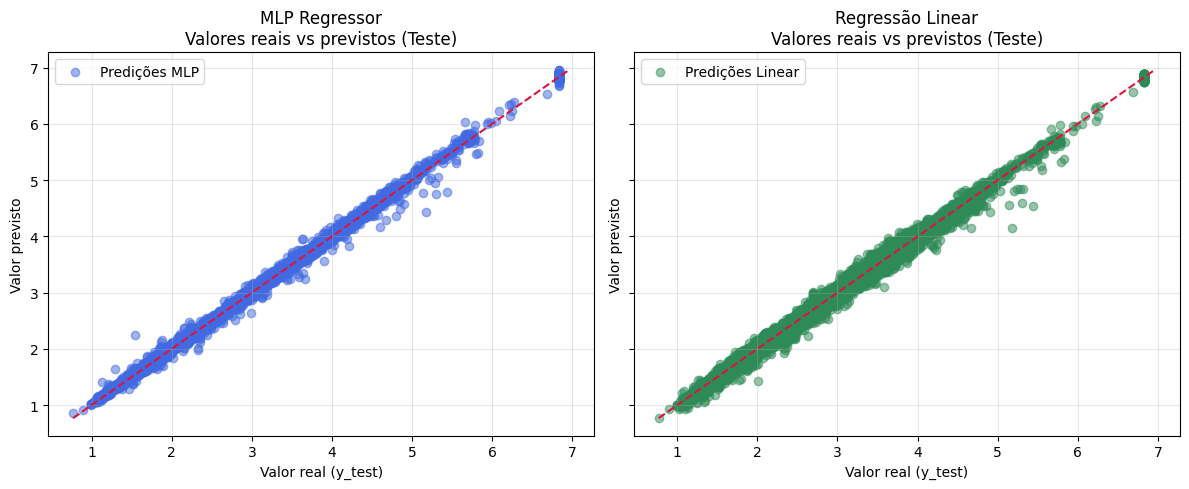

In [326]:
# y_true vs y_pred (Teste) – MLP x Linear

min_val = min(y_test.min(), y_test_pred_mlp.min(), y_test_pred_lin.min())
max_val = max(y_test.max(), y_test_pred_mlp.max(), y_test_pred_lin.max())

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# MLP
axes[0].scatter(
    y_test,
    y_test_pred_mlp,
    alpha=0.5,
    color="royalblue",
    label="Predições MLP"
)
axes[0].plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    color="crimson",
)
axes[0].set_title("MLP Regressor\nValores reais vs previstos (Teste)")
axes[0].set_xlabel("Valor real (y_test)")
axes[0].set_ylabel("Valor previsto")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Linear Regression
axes[1].scatter(
    y_test,
    y_test_pred_lin,
    alpha=0.5,
    color="seagreen",
    label="Predições Linear"
)
axes[1].plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    color="crimson",
)
axes[1].set_title("Regressão Linear\nValores reais vs previstos (Teste)")
axes[1].set_xlabel("Valor real (y_test)")
axes[1].set_ylabel("Valor previsto")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

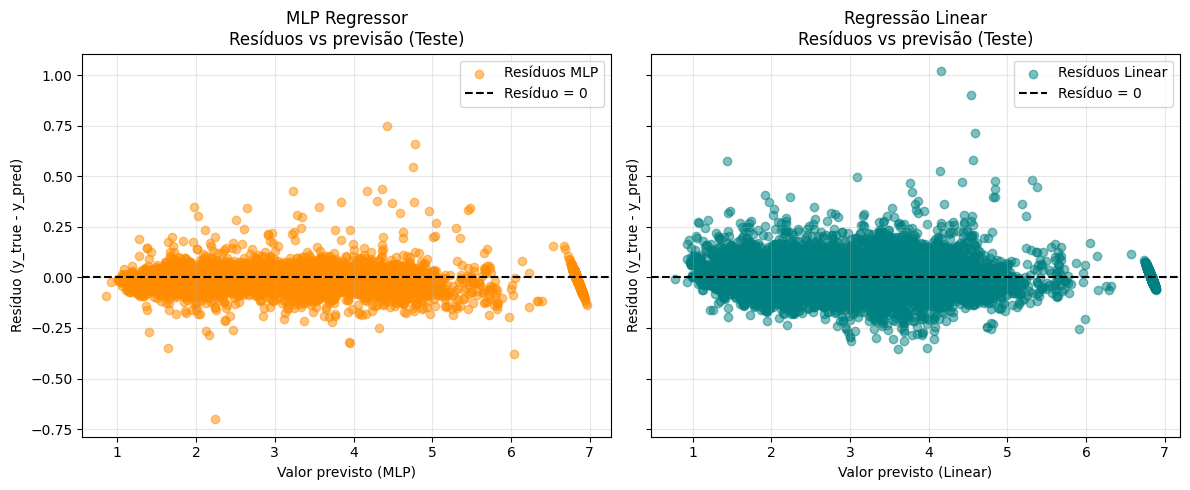

In [327]:
# Resíduos vs Previsão

residuos_mlp = y_test - y_test_pred_mlp
residuos_lin = y_test - y_test_pred_lin

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# MLP
axes[0].scatter(
    y_test_pred_mlp,
    residuos_mlp,
    alpha=0.5,
    color="darkorange",
    label="Resíduos MLP"
)
axes[0].axhline(0, linestyle="--", color="black", label="Resíduo = 0")
axes[0].set_title("MLP Regressor\nResíduos vs previsão (Teste)")
axes[0].set_xlabel("Valor previsto (MLP)")
axes[0].set_ylabel("Resíduo (y_true - y_pred)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Linear Regression
axes[1].scatter(
    y_test_pred_lin,
    residuos_lin,
    alpha=0.5,
    color="teal",
    label="Resíduos Linear"
)
axes[1].axhline(0, linestyle="--", color="black", label="Resíduo = 0")
axes[1].set_title("Regressão Linear\nResíduos vs previsão (Teste)")
axes[1].set_xlabel("Valor previsto (Linear)")
axes[1].set_ylabel("Resíduo (y_true - y_pred)")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

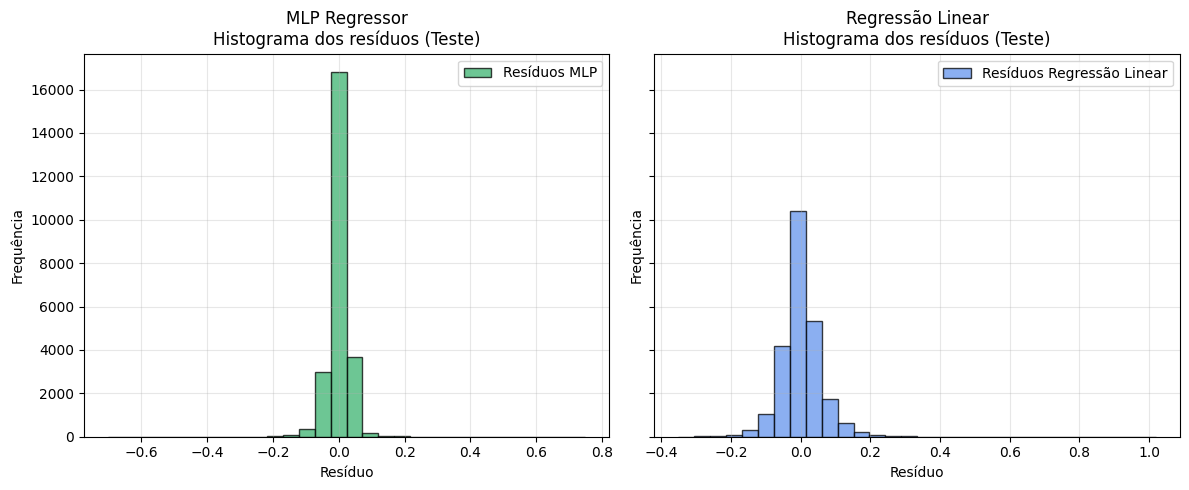

In [328]:
# Histograma dos resíduos

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

all_resids = np.concatenate([residuos_mlp, residuos_lin])
bins = 30

# MLP
axes[0].hist(
    residuos_mlp,
    bins=bins,
    color="mediumseagreen",
    alpha=0.75,
    edgecolor="black",
    label="Resíduos MLP"
)
axes[0].set_title("MLP Regressor\nHistograma dos resíduos (Teste)")
axes[0].set_xlabel("Resíduo")
axes[0].set_ylabel("Frequência")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Linear Regression
axes[1].hist(
    residuos_lin,
    bins=bins,
    color="cornflowerblue",
    alpha=0.75,
    edgecolor="black",
    label="Resíduos Regressão Linear"
)
axes[1].set_title("Regressão Linear\nHistograma dos resíduos (Teste)")
axes[1].set_xlabel("Resíduo")
axes[1].set_ylabel("Frequência")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

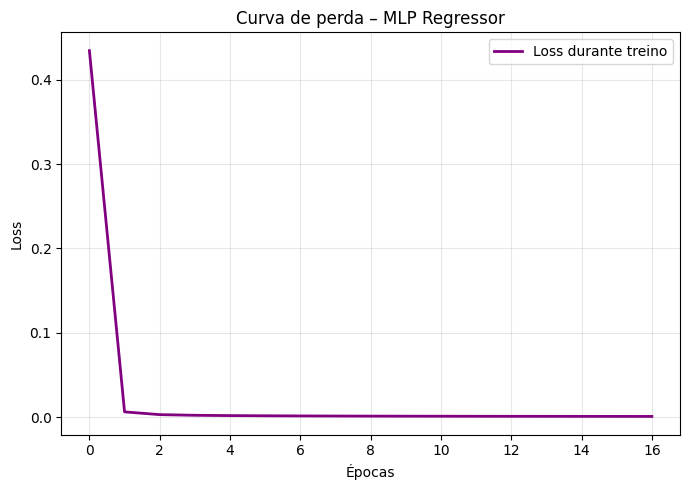

In [329]:
# Curva de perda (loss)

plt.figure(figsize=(7, 5))
plt.plot(
    mlp.loss_curve_, 
    color="purple", 
    linewidth=2,
    label="Loss durante treino"
)
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Curva de perda – MLP Regressor")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()